<h2 style="color:darkred;font-size:30px">Projet 7 : Implémentez un modèle de scoring</h2>

<img src="support\pret_a_depenser.png" style="width: 250px;"/>

<h2 style="color:darkred;font-size:30px">Notebook </h2>

---
---
---

Basé sur : https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

<h2 style="color:darkred;font-size:20px">Projet</h2>

Vous êtes Data Scientist au sein d'une société financière, nommée "Prêt à dépenser",  qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.

L’entreprise souhaite mettre en œuvre un outil de “scoring crédit” pour calculer la probabilité qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Elle souhaite donc développer un algorithme de classification en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.).

De plus, les chargés de relation client ont fait remonter le fait que les clients sont de plus en plus demandeurs de transparence vis-à-vis des décisions d’octroi de crédit. Cette demande de transparence des clients va tout à fait dans le sens des valeurs que l’entreprise veut incarner.

Prêt à dépenser décide donc de développer un dashboard interactif pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement. 

<h2 style="color:darkred;font-size:20px">Dataset resource</h2>

Voici les données dont vous aurez besoin pour réaliser le dashboard.

https://www.kaggle.com/c/home-credit-default-risk/data

Pour plus de simplicité, vous pouvez les télécharger à cette adresse.

https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Implémenter+un+modèle+de+scoring/Projet+Mise+en+prod+-+home-credit-default-risk.zip

<h2 style="color:darkred;font-size:20px">L'objectif</h2>

    1. Construire un modèle de scoring qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique.

    2. Construire un dashboard interactif à destination des gestionnaires de la relation client permettant d'interpréter les prédictions faites par le modèle, et d’améliorer la connaissance client des chargés de relation client.
    
Michaël, votre manager, vous incite à sélectionner un kernel Kaggle pour vous faciliter la préparation des données nécessaires à l’élaboration du modèle de scoring. Vous analyserez ce kernel et l’adapterez pour vous assurer qu’il répond aux besoins de votre mission.

Vous pourrez ainsi vous focaliser sur l’élaboration du modèle, son optimisation et sa compréhension.

<h2 style="color:darkred;font-size:20px">Spécifications du dashboard</h2>

    - Permettre de visualiser le score et l’interprétation de ce score pour chaque client de façon intelligible pour une personne non experte en data science.
    
    - Permettre de visualiser des informations descriptives relatives à un client (via un système de filtre).
    
    - Permettre de comparer les informations descriptives relatives à un client à l’ensemble des clients ou à un groupe de clients similaires.
    
<h2 style="color:darkred;font-size:20px">Livrables</h2>

- Le dashboard interactif répondant aux spécifications ci-dessus et l’API de prédiction du score, déployées chacunes sur le cloud.
- Un dossier sur un outil de versioning de code contenant :
    - Le code de la modélisation (du prétraitement à la prédiction)
    - Le code générant le dashboard
    - Le code permettant de déployer le modèle sous forme d'API
- Une note méthodologique décrivant :
    - La méthodologie d'entraînement du modèle (2 pages maximum)
    - La fonction coût métier, l'algorithme d'optimisation et la métrique d'évaluation (1 page maximum)
    - L’interprétabilité globale et locale du modèle (1 page maximum)
    - Les limites et les améliorations possibles (1 page maximum)
- Un support de présentation pour la soutenance, détaillant le travail réalisé.

<h2 style="color:darkred;font-size:20px">Sommaire</h2>



# 1. Le kernel Kaggle

Nous commençons par analyser le travail suivant. Nous avons conservé 
- nettoyage du dataset
- analyse exploratoire
- features engineering

éffectués dans ce kernel. Ce travail comptait également des modélisations tant que Régression Logistique et Random Forest. Dans ce notebook nous réalisons une nouvelle démarche sur la partie de modélisation.

----
----
----
https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

_par WILL KOEHRSEN_

----

# Introduction: Home Credit Default Risk Competition

This notebook is intended for those who are new to machine learning competitions or want a gentle introduction to the problem. I purposely avoid jumping into complicated models or joining together lots of data in order to show the basics of how to get started in machine learning! Any comments or suggestions are much appreciated.

In this notebook, we will take an initial look at the Home Credit default risk machine learning competition currently hosted on Kaggle. The objective of this competition is to use historical loan application data to predict whether or not an applicant will be able to repay a loan. This is a standard supervised classification task:

* __Supervised__: The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features
* __Classification__: The label is a binary variable, 0 (will repay loan on time), 1 (will have difficulty repaying loan)


# Data

The data is provided by [Home Credit](http://www.homecredit.net/about-us.aspx), a service dedicated to provided lines of credit (loans) to the unbanked population. Predicting whether or not a client will repay a loan or have difficulty is a critical business need, and Home Credit is hosting this competition on Kaggle to see what sort of models the machine learning community can develop to help them in this task. 

There are 7 different sources of data:

* application_train/application_test: the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature `SK_ID_CURR`. The training application data comes with the `TARGET` indicating 0: the loan was repaid or 1: the loan was not repaid. 
* bureau: data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* bureau_balance: monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length. 
* previous_application: previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature `SK_ID_PREV`. 
* POS_CASH_BALANCE: monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* installments_payment: payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment. 

This diagram shows how all of the data is related:

![image](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

Moreover, we are provided with the definitions of all the columns (in `HomeCredit_columns_description.csv`) and an example of the expected submission file. 

In this notebook, we will stick to using only the main application training and testing data. Although if we want to have any hope of seriously competing, we need to use all the data, for now we will stick to one file which should be more manageable. This will let us establish a baseline that we can then improve upon. With these projects, it's best to build up an understanding of the problem a little at a time rather than diving all the way in and getting completely lost! 

## Metric: ROC AUC

Once we have a grasp of the data (reading through the [column descriptions](https://www.kaggle.com/c/home-credit-default-risk/data) helps immensely), we need to understand the metric by which our submission is judged. In this case, it is a common classification metric known as the [Receiver Operating Characteristic Area Under the Curve (ROC AUC, also sometimes called AUROC)](https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it).

The ROC AUC may sound intimidating, but it is relatively straightforward once you can get your head around the two individual concepts. The [Reciever Operating Characteristic (ROC) curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) graphs the true positive rate versus the false positive rate:

![image](http://www.statisticshowto.com/wp-content/uploads/2016/08/ROC-curve.png)

A single line on the graph indicates the curve for a single model, and movement along a line indicates changing the threshold used for classifying a positive instance. The threshold starts at 0 in the upper right to and goes to 1 in the lower left. A curve that is to the left and above another curve indicates a better model. For example, the blue model is better than the red model, which is better than the black diagonal line which indicates a naive random guessing model. 

The [Area Under the Curve (AUC)](http://gim.unmc.edu/dxtests/roc3.htm) explains itself by its name! It is simply the area under the ROC curve. (This is the integral of the curve.) This metric is between 0 and 1 with a better model scoring higher. A model that simply guesses at random will have an ROC AUC of 0.5.

When we measure a classifier according to the ROC AUC, we do not generation 0 or 1 predictions, but rather a probability between 0 and 1. This may be confusing because we usually like to think in terms of accuracy, but when we get into problems with inbalanced classes (we will see this is the case), accuracy is not the best metric. For example, if I wanted to build a model that could detect terrorists with 99.9999% accuracy, I would simply make a model that predicted every single person was not a terrorist. Clearly, this would not be effective (the recall would be zero) and we use more advanced metrics such as ROC AUC or the [F1 score](https://en.wikipedia.org/wiki/F1_score) to more accurately reflect the performance of a classifier. A model with a high ROC AUC will also have a high accuracy, but the [ROC AUC is a better representation of model performance.](https://datascience.stackexchange.com/questions/806/advantages-of-auc-vs-standard-accuracy)

Not that we know the background of the data we are using and the metric to maximize, let's get into exploring the data. In this notebook, as mentioned previously, we will stick to the main data sources and simple models which we can build upon in future work. 

__Follow-up Notebooks__

For those looking to keep working on this problem, I have a series of follow-up notebooks:

* [Manual Feature Engineering Part One](https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering)
* [Manual Feature Engineering Part Two](https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering-p2)
* [Introduction to Automated Feature Engineering](https://www.kaggle.com/willkoehrsen/automated-feature-engineering-basics)
* [Advanced Automated Feature Engineering](https://www.kaggle.com/willkoehrsen/tuning-automated-feature-engineering-exploratory)
* [Feature Selection](https://www.kaggle.com/willkoehrsen/introduction-to-feature-selection)
* [Intro to Model Tuning: Grid and Random Search](https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search)
* [Automated Model Tuning](https://www.kaggle.com/willkoehrsen/automated-model-tuning)
* [Model Tuning Results](https://www.kaggle.com/willkoehrsen/model-tuning-results-random-vs-bayesian-opt/notebook)


I'll add more notebooks as I finish them! Thanks for all the comments! 

## Imports

We are using a typical data science stack: `numpy`, `pandas`, `sklearn`, `matplotlib`. 

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Read in Data 

First, we can list all the available data files. There are a total of 9 files: 1 main file for training (with target) 1 main file for testing (without the target), 1 example submission file, and 6 other files containing additional information about each loan. 

In [2]:
# List files available
print(os.listdir("data"))

['application_test.csv', '.DS_Store', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'data_sampled.csv', 'sample_submission.csv']


In [3]:
# Training data
app_train = pd.read_csv('data/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
list(app_train.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

The training data has 307511 observations (each one a separate loan) and 122 features (variables) including the `TARGET` (the label we want to predict).

In [5]:
# Testing data features
app_test = pd.read_csv('data/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

The test set is considerably smaller and lacks a `TARGET` column. 

# 2. Exploratory Data Analysis I

Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. The goal of EDA is to learn what our data can tell us. It generally starts out with a high level overview, then narrows in to specific areas as we find intriguing areas of the data. The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.

## Examine the Distribution of the Target Column

The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We can first examine the number of loans falling into each category.

In [6]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

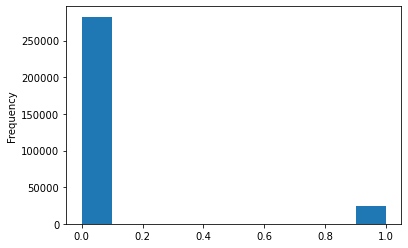

In [7]:
app_train['TARGET'].astype(int).plot.hist();

From this information, we see this is an [_imbalanced class problem_](http://www.chioka.in/class-imbalance-problem/). There are far more loans that were repaid on time than loans that were not repaid. Once we get into more sophisticated machine learning models, we can [weight the classes](http://xgboost.readthedocs.io/en/latest/parameter.html) by their representation in the data to reflect this imbalance. 

## Examine Missing Values

Next we can look at the number and percentage of missing values in each column. 

In [8]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
YEARS_BUILD_AVG                   204488               66.5
OWN_CAR_AGE                       202929               66.0
LANDAREA_AVG                      182590               59.4
LANDAREA_MEDI                     182590               59.4
LANDAREA_MODE                     182590               59.4

In [10]:
# la fonction suivante nous permet de visualiser le taux des valeurs manquantes par colonne

# style de titres
font = {
    'family': 'Arial',
    'color': 'darkred',
    'weight': 'bold',
    'size': 30,
}

def manquant_graphique_h (data, thresh=80, color='black', edgecolor='blue', width=20, height=5):
    
    plt.figure(figsize=(width,height), dpi=600)
    percentage = 100 - (data.isnull().mean())*100
    # hline = 100 - (data['ENERGYSTARScore'].isnull().mean())*100
    ax = percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    # ax.annotate('EnergyStar {} %'.format(round(hline, ndigits=1)), xy =(38, 77),
    #            xytext =(38, 97), 
    #            arrowprops = dict(facecolor ='darkred',
    #                              shrink = 0.05),
    #            color='darkred',
    #            weight ='bold',
    #            size=14
    #           )
    # plt.axhline(y=hline, color='darkred', linestyle='-')
    plt.title('Le pourcentage de remplissage par colonne', fontdict=font, pad=50)
    plt.xlabel('Les colonnes', size=18, weight='bold')
    plt.ylabel('Le pourcentage de valeurs présentes', size=13, weight='bold')
    plt.yticks(weight ='bold', size=12)
    plt.xticks(size=10)
    
    return plt.show()

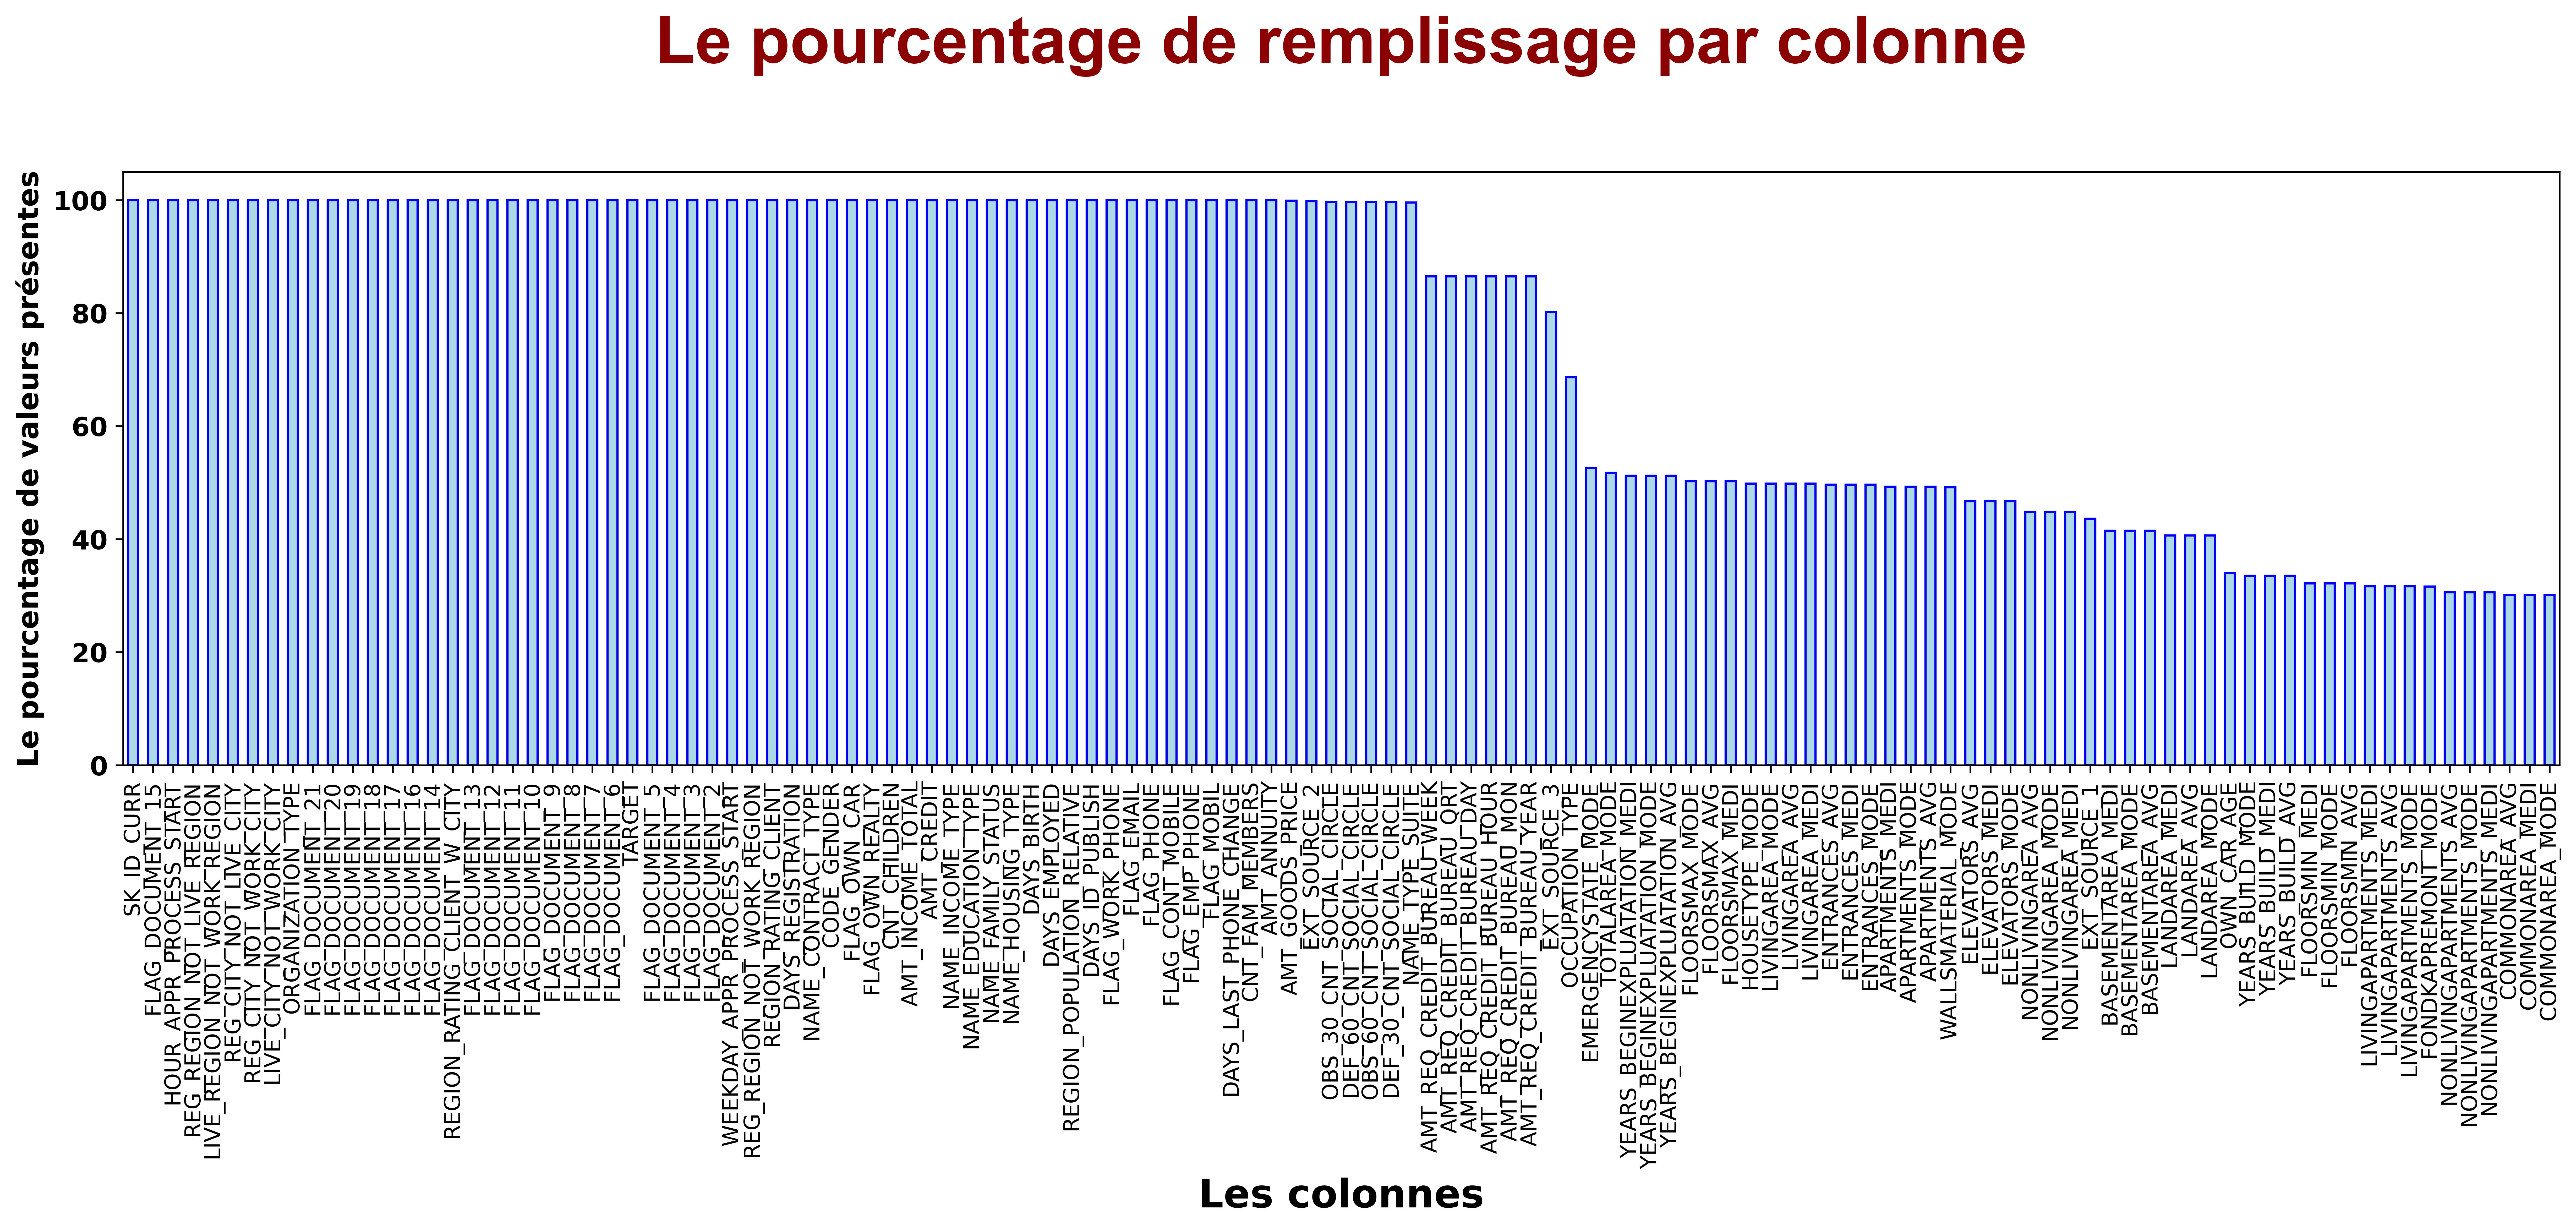

In [11]:
manquant_graphique_h (app_train, 10, color='lightblue')

When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). In later work, we will use models such as XGBoost that can [handle missing values with no need for imputation](https://stats.stackexchange.com/questions/235489/xgboost-can-handle-missing-data-in-the-forecasting-phase). Another option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.

## Column Types

Let's look at the number of columns of each data type. `int64` and `float64` are numeric variables ([which can be either discrete or continuous](https://stats.stackexchange.com/questions/206/what-is-the-difference-between-discrete-data-and-continuous-data)). `object` columns contain strings and are  [categorical features.](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/) . 

In [12]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Let's now look at the number of unique entries in each of the `object` (categorical) columns.

In [13]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Most of the categorical variables have a relatively small number of unique entries. We will need to find a way to deal with these categorical variables! 

# 3. Encoding Categorical Variables

Before we go any further, we need to deal with pesky categorical variables.  A machine learning model unfortunately cannot deal with categorical variables (except for some models such as [LightGBM](http://lightgbm.readthedocs.io/en/latest/Features.html)). Therefore, we have to find a way to encode (represent) these variables as numbers before handing them off to the model. There are two main ways to carry out this process:

* Label encoding: assign each unique category in a categorical variable with an integer. No new columns are created. An example is shown below

![image](https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/label_encoding.png)

* One-hot encoding: create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns. 

![image](https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/one_hot_encoding.png)

The problem with label encoding is that it gives the categories an arbitrary ordering. The value assigned to each of the categories is random and does not reflect any inherent aspect of the category. In the example above, programmer recieves a 4 and data scientist a 1, but if we did the same process again, the labels could be reversed or completely different. The actual assignment of the integers is arbitrary. Therefore, when we perform label encoding, the model might use the relative value of the feature (for example programmer = 4 and data scientist = 1) to assign weights which is not what we want. If we only have two unique values for a categorical variable (such as Male/Female), then label encoding is fine, but for more than 2 unique categories, one-hot encoding is the safe option.

There is some debate about the relative merits of these approaches, and some models can deal with label encoded categorical variables with no issues. [Here is a good Stack Overflow discussion](https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor). I think (and this is just a personal opinion) for categorical variables with many classes, one-hot encoding is the safest approach because it does not impose arbitrary values to categories. The only downside to one-hot encoding is that the number of features (dimensions of the data) can explode with categorical variables with many categories. To deal with this, we can perform one-hot encoding followed by [PCA](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf) or other [dimensionality reduction methods](https://www.analyticsvidhya.com/blog/2015/07/dimension-reduction-methods/) to reduce the number of dimensions (while still trying to preserve information). 

In this notebook, we will use Label Encoding for any categorical variables with only 2 categories and One-Hot Encoding for any categorical variables with more than 2 categories. This process may need to change as we get further into the project, but for now, we will see where this gets us. (We will also not use any dimensionality reduction in this notebook but will explore in future iterations).

### 3.1. Label Encoding and One-Hot Encoding

Let's implement the policy described above: for any categorical variable (`dtype == object`) with 2 unique categories, we will use label encoding, and for any categorical variable with more than 2 unique categories, we will use one-hot encoding. 

For label encoding, we use the Scikit-Learn `LabelEncoder` and for one-hot encoding, the pandas `get_dummies(df)` function.

In [14]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [15]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


### 3.2. Aligning Training and Testing Data

There need to be the same features (columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to `align` the dataframes. First we extract the target column from the training data (because this is not in the testing data but we need to keep this information). When we do the align, we must make sure to set `axis = 1` to align the dataframes based on the columns and not on the rows!

In [16]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


The training and testing datasets now have the same features which is required for machine learning. The number of features has grown significantly due to one-hot encoding. At some point we probably will want to try [dimensionality reduction (removing features that are not relevant)](https://en.wikipedia.org/wiki/Dimensionality_reduction) to reduce the size of the datasets.

# 4. Back to Exploratory Data Analysis

### 4.1. Anomalies

One problem we always want to be on the lookout for when doing EDA is anomalies within the data. These may be due to mis-typed numbers, errors in measuring equipment, or they could be valid but extreme measurements. One way to support anomalies quantitatively is by looking at the statistics of a column using the `describe` method. The numbers in the `DAYS_BIRTH` column are negative because they are recorded relative to the current loan application. To see these stats in years, we can mutliple by -1 and divide by the number of days in a year:



In [17]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Those ages look reasonable. There are no outliers for the age on either the high or low end. How about the days of employment? 

In [18]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

That doesn't look right! The maximum value (besides being positive) is about 1000 years! 

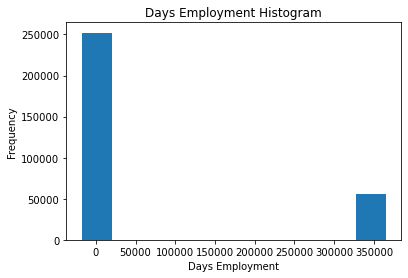

In [19]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Just out of curiousity, let's subset the anomalous clients and see if they tend to have higher or low rates of default than the rest of the clients.

In [20]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Well that is extremely interesting! It turns out that the anomalies have a lower rate of default. 

Handling the anomalies depends on the exact situation, with no set rules. One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common. The anomalous values seem to have some importance, so we want to tell the machine learning model if we did in fact fill in these values. As a solution, we will fill in the anomalous values with not a number (`np.nan`) and then create a new boolean column indicating whether or not the value was anomalous.



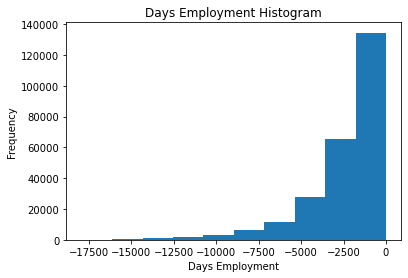

In [21]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

The distribution looks to be much more in line with what we would expect, and we also have created a new column to tell the model that these values were originally anomalous (becuase we will have to fill in the nans with some value, probably the median of the column). The other columns with `DAYS` in the dataframe look to be about what we expect with no obvious outliers. 

As an extremely important note, anything we do to the training data we also have to do to the testing data. Let's make sure to create the new column and fill in the existing column with `np.nan` in the testing data.

In [22]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


### 4.2. Correlations

Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the `.corr` dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some [general interpretations of the absolute value of the correlation coefficent](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf) are:


* .00-.19 “very weak”
*  .20-.39 “weak”
*  .40-.59 “moderate”
*  .60-.79 “strong”
* .80-1.0 “very strong”


In [23]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

Let's take a look at some of more significant correlations: the `DAYS_BIRTH` is the most positive correlation. (except for `TARGET` because the correlation of a variable with itself is always 1!) Looking at the documentation, `DAYS_BIRTH` is the age in days of the client at the time of the loan in negative days (for whatever reason!). The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0). That's a little confusing, so we will take the absolute value of the feature and then the correlation will be negative.

### 4.3. Effect of Age on Repayment

In [24]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often. 

Let's start looking at this variable. First, we can make a histogram of the age. We will put the x axis in years to make the plot a little more understandable.

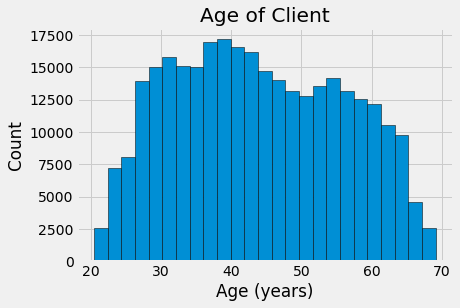

In [25]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. To visualize the effect of the age on the target, we will next make a [kernel density estimation plot](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) colored by the value of the target. A [kernel density estimate plot shows the distribution of a single variable](https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/) and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn `kdeplot` for this graph.

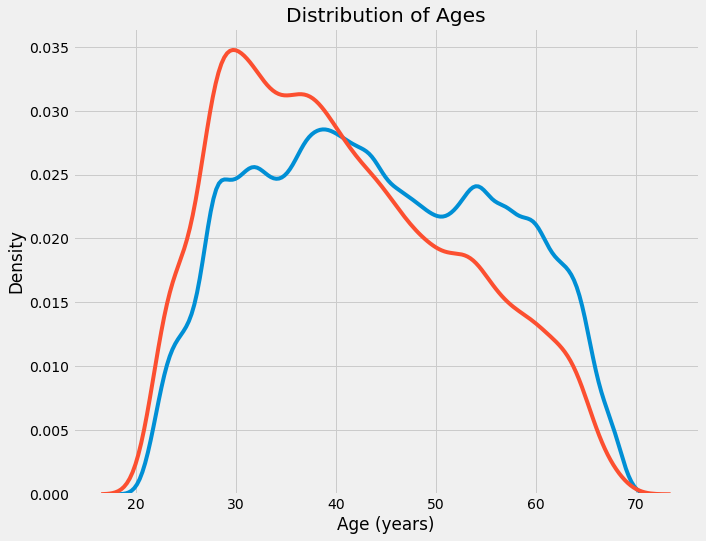

In [26]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. Let's look at this relationship in another way: average failure to repay loans by age bracket. 

To make this graph, first we `cut` the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target, which tells us the ratio of loans that were not repaid in each age category.

In [27]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1        9461    25.920548  (25.0, 30.0]
1       0       16765    45.931507  (45.0, 50.0]
2       0       19046    52.180822  (50.0, 55.0]
3       0       19005    52.068493  (50.0, 55.0]
4       0       19932    54.608219  (50.0, 55.0]
5       0       16941    46.413699  (45.0, 50.0]
6       0       13778    37.747945  (35.0, 40.0]
7       0       18850    51.643836  (50.0, 55.0]
8       0       20099    55.065753  (55.0, 60.0]
9       0       14469    39.641096  (35.0, 40.0]

In [28]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036   8532.795625    23.377522
(25.0, 30.0]  0.111436  10155.219250    27.822518
(30.0, 35.0]  0.102814  11854.848377    32.479037
(35.0, 40.0]  0.089414  13707.908253    37.555913
(40.0, 45.0]  0.078491  15497.661233    42.459346
(45.0, 50.0]  0.074171  17323.900441    47.462741
(50.0, 55.0]  0.066968  19196.494791    52.593136
(55.0, 60.0]  0.055314  20984.262742    57.491131
(60.0, 65.0]  0.052737  22780.547460    62.412459
(65.0, 70.0]  0.037270  24292.614340    66.555108

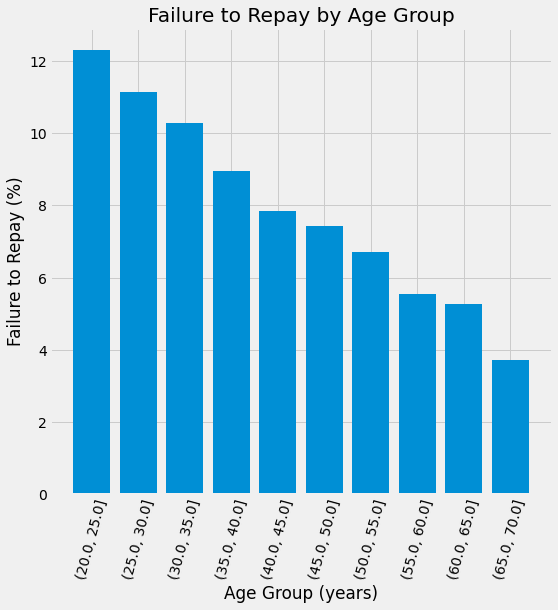

In [29]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

This is information that could be directly used by the bank: because younger clients are less likely to repay the loan, maybe they should be provided with more guidance or financial planning tips. This does not mean the bank should discriminate against younger clients, but it would be smart to take precautionary measures to help younger clients pay on time.

### 4.4. Exterior Sources

The 3 variables with the strongest negative correlations with the target are `EXT_SOURCE_1`, `EXT_SOURCE_2`, and `EXT_SOURCE_3`.
According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data. 

Let's take a look at these variables.

First, we can show the correlations of the `EXT_SOURCE` features with the target and with each other.

In [30]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919   -0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846    0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167    0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000    0.205478
DAYS_BIRTH   -0.078239      0.600610      0.091996      0.205478    1.000000

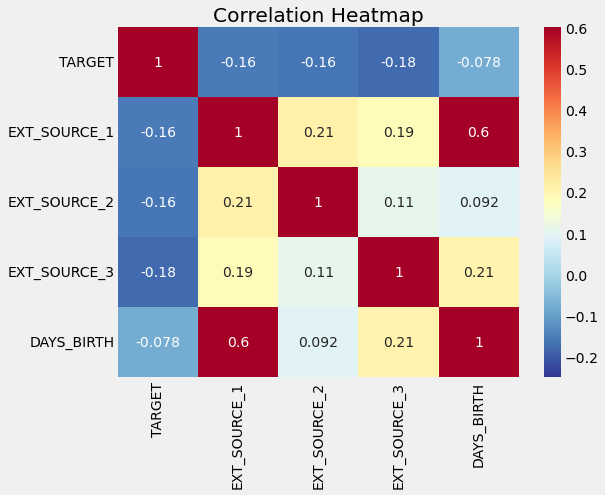

In [31]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

All three `EXT_SOURCE` featureshave negative correlations with the target, indicating that as the value of the `EXT_SOURCE` increases, the client is more likely to repay the loan. We can also see that `DAYS_BIRTH` is positively correlated with `EXT_SOURCE_1` indicating that maybe one of the factors in this score is the client age.

Next we can look at the distribution of each of these features colored by the value of the target. This will let us visualize the effect of this variable on the target.

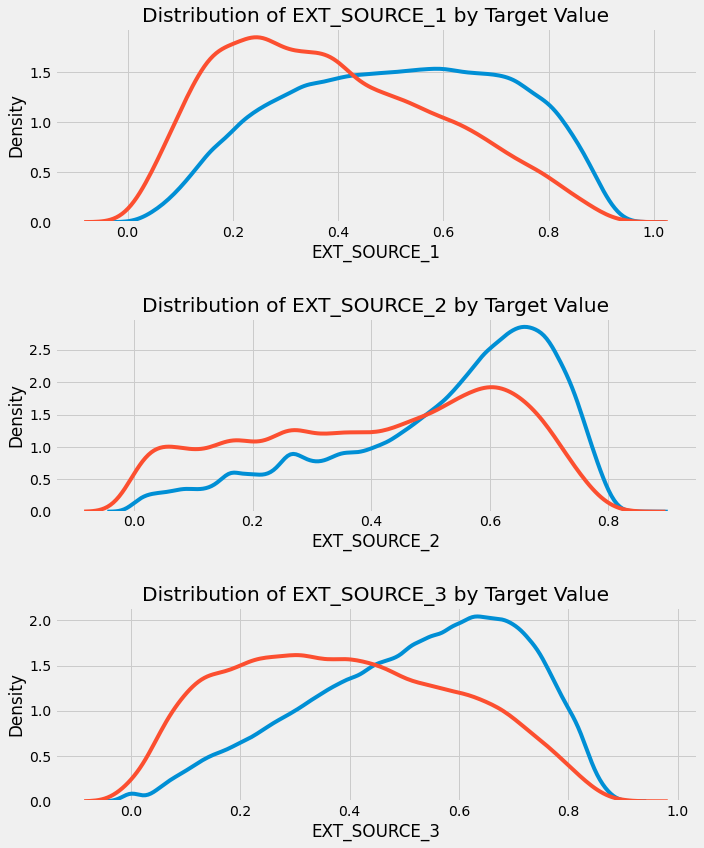

In [32]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)
    

`EXT_SOURCE_3` displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong (in fact they are all [considered very weak](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf), but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

### 4.5. Pairs Plot

As a final exploratory plot, we can make a pairs plot of the `EXT_SOURCE` variables and the `DAYS_BIRTH` variable. The [Pairs Plot](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166) is a great exploration tool because it lets us see relationships between multiple pairs of variables as well as distributions of single variables. Here we are using the seaborn visualization library and the PairGrid function to create a Pairs Plot with scatterplots on the upper triangle, histograms on the diagonal, and 2D kernel density plots and correlation coefficients on the lower triangle.

If you don't understand this code, that's all right! Plotting in Python can be overly complex, and for anything beyond the simplest graphs, I usually find an existing implementation and adapt the code (don't repeat yourself)! 

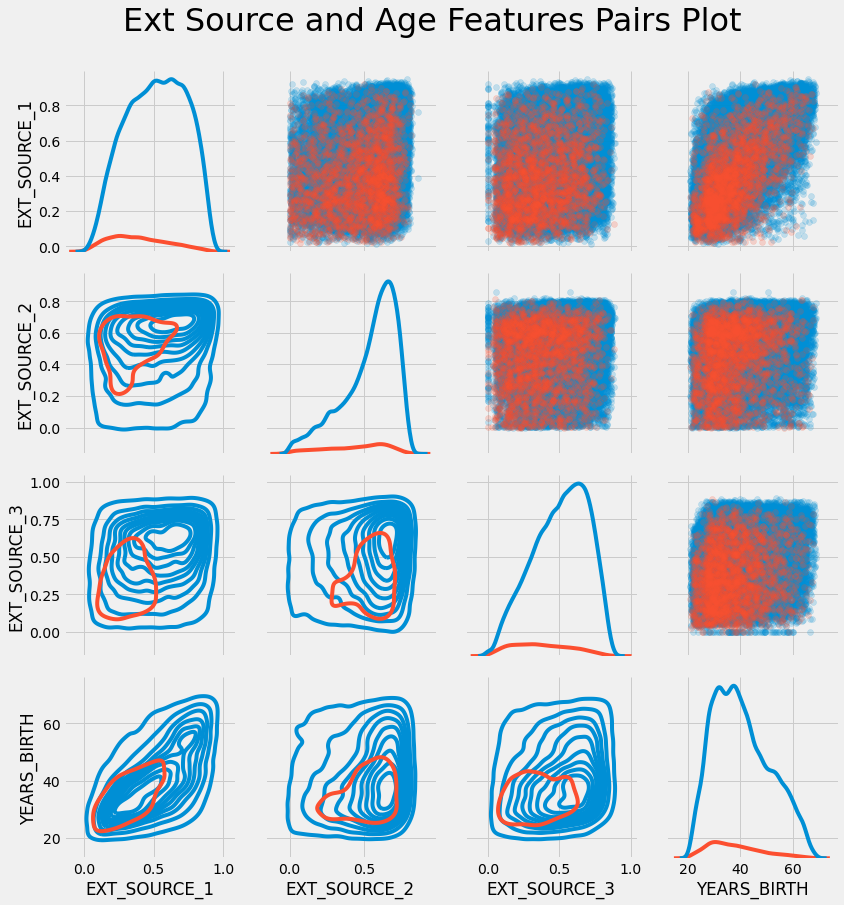

In [33]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

In this plot, the red indicates loans that were not repaid and the blue are loans that are paid. We can see the different relationships within the data. There does appear to be a moderate positive linear relationship between the `EXT_SOURCE_1` and the `DAYS_BIRTH` (or equivalently `YEARS_BIRTH`), indicating that this feature may take into account the age of the client. 

# 5. Feature Engineering

Kaggle competitions are won by feature engineering: those win are those who can create the most useful features out of the data. (This is true for the most part as the winning models, at least for structured data, all tend to be variants on [gradient boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)). This represents one of the patterns in machine learning: feature engineering has a greater return on investment than model building and hyperparameter tuning. [This is a great article on the subject)](https://www.featurelabs.com/blog/secret-to-data-science-success/). As Andrew Ng is fond of saying: "applied machine learning is basically feature engineering." 

While choosing the right model and optimal settings are important, the model can only learn from the data it is given. Making sure this data is as relevant to the task as possible is the job of the data scientist (and maybe some [automated tools](https://docs.featuretools.com/getting_started/install.html) to help us out).

Feature engineering refers to a geneal process and can involve both feature construction: adding new features from the existing data, and feature selection: choosing only the most important features or other methods of dimensionality reduction. There are many techniques we can use to both create features and select features.

We will do a lot of feature engineering when we start using the other data sources, but in this notebook we will try only two simple feature construction methods: 

* Polynomial features
* Domain knowledge features


## 5.1. Polynomial Features

One simple feature construction method is called [polynomial features](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). In this method, we make features that are powers of existing features as well as interaction terms between existing features. For example, we can create variables `EXT_SOURCE_1^2` and `EXT_SOURCE_2^2` and also variables such as `EXT_SOURCE_1` x `EXT_SOURCE_2`, `EXT_SOURCE_1` x `EXT_SOURCE_2^2`, `EXT_SOURCE_1^2` x   `EXT_SOURCE_2^2`, and so on. These features that are a combination of multiple individual variables are called [interaction terms](https://en.wikipedia.org/wiki/Interaction_(statistics) because they  capture the interactions between variables. In other words, while two variables by themselves  may not have a strong influence on the target, combining them together into a single interaction variable might show a relationship with the target. [Interaction terms are commonly used in statistical models](https://www.theanalysisfactor.com/interpreting-interactions-in-regression/) to capture the effects of multiple variables, but I do not see them used as often in machine learning. Nonetheless, we can try out a few to see if they might help our model to predict whether or not a client will repay a loan. 

Jake VanderPlas writes about [polynomial features in his excellent book Python for Data Science](https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html) for those who want more information.

In the following code, we create polynomial features using the `EXT_SOURCE` variables and the `DAYS_BIRTH` variable. [Scikit-Learn has a useful class called `PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) that creates the polynomials and the interaction terms up to a specified degree. We can use a degree of 3 to see the results (when we are creating polynomial features, we want to avoid using too high of a degree, both because the number of features scales exponentially with the degree, and because we can run into [problems with overfitting](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py)). 

In [34]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
# from sklearn.preprocessing import Imputer
# imputer = Imputer(strategy = 'median')
# ÇA NE FONCTIONNE PLUS COMME 'Imputer'; NOUS ALLONS UTILISER 'SimpleImputer'

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')


poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [35]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


This creates a considerable number of new features. To get the names we have to use the polynomial features `get_feature_names` method.

In [36]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

There are 35 features with individual features raised to powers up to degree 3 and interaction terms. Now, we can see whether any of these new features are correlated with the target.

In [37]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


Several of the new variables have a greater (in terms of absolute magnitude) correlation with the target than the original features. When we build machine learning models, we can try with and without these features to determine if they actually help the model learn. 

We will add these features to a copy of the training and testing data and then evaluate models with and without the features. Many times in machine learning, the only way to know if an approach will work is to try it out! 

In [38]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


## 5.2. Domain Knowledge Features

Maybe it's not entirely correct to call this "domain knowledge" because I'm not a credit expert, but perhaps we could call this "attempts at applying limited financial knowledge". In this frame of mind, we can make a couple features that attempt to capture what we think may be important for telling whether a client will default on a loan. Here I'm going to use five features that were inspired by [this script](https://www.kaggle.com/jsaguiar/updated-0-792-lb-lightgbm-with-simple-features) by Aguiar:

* `CREDIT_INCOME_PERCENT`: the percentage of the credit amount relative to a client's income
* `ANNUITY_INCOME_PERCENT`: the percentage of the loan annuity relative to a client's income
* `CREDIT_TERM`:  the length of the payment in months (since the annuity is the monthly amount due
* `DAYS_EMPLOYED_PERCENT`: the percentage of the days employed relative to the client's age

Again, thanks to Aguiar and [his great script](https://www.kaggle.com/jsaguiar/updated-0-792-lb-lightgbm-with-simple-features) for exploring these features.



In [39]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [40]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

#### Visualize New Variables

We should explore these __domain knowledge__ variables visually in a graph. For all of these, we will make the same KDE plot colored by the value of the `TARGET`.

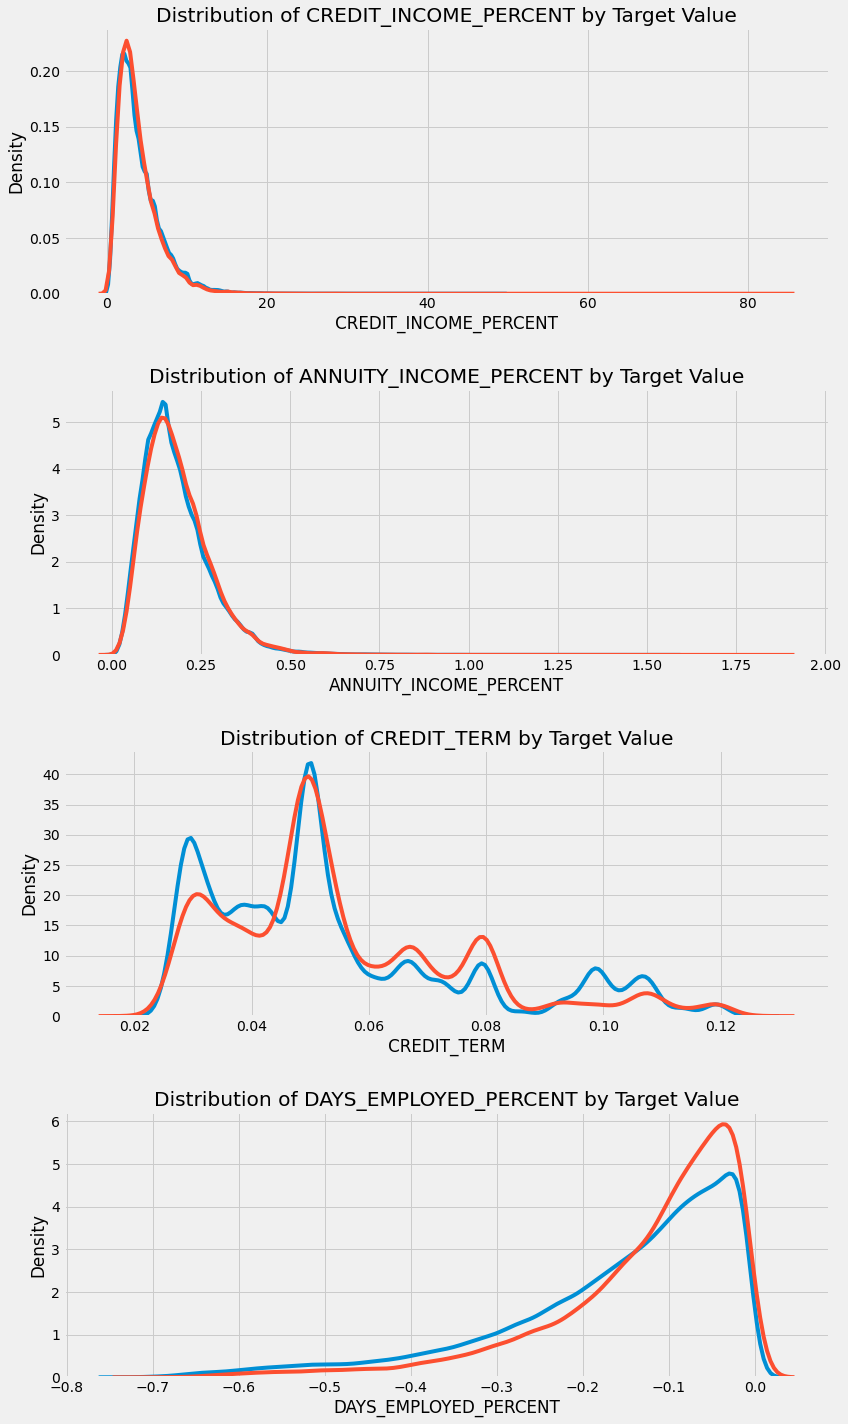

In [41]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

It's hard to say ahead of time if these new features will be useful. The only way to tell for sure is to try them out! 

# 6. Preprocessing et échantionnage des données

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

def preprocesseur (data_train, data_test):
    # Drop the target from the training data
    if 'TARGET' in data_train:
        train = data_train.drop(columns = ['TARGET'])
    else:
        train = data_train.copy()

    # Feature names
    features = list(train.columns)
    
    # Copy of the testing data
    test = data_test.copy()
    
    # Median imputation of missing values
    imputer = SimpleImputer(strategy = 'median')
    
    # Scale each feature to 0-1
    scaler = MinMaxScaler(feature_range = (0, 1))
    
    # Fit on the training data
    imputer.fit(train)
    
    # Transform both training and testing data
    train = imputer.transform(train)
    test = imputer.transform(data_test)
    
    # Repeat with the scaler
    scaler.fit(train)
    train = scaler.transform(train)
    test = scaler.transform(test)

    return train, test

In [43]:
def echantionnage (dataset, target):
    X = dataset.copy()
    y = target.copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

    return X_train, X_test, y_train, y_test

### 6.1. Echantionnage des données sans Feature Engineering

In [44]:
train, test = preprocesseur(app_train, app_test)

print('train shape : {}'.format(train.shape))
print('test shape : {}'.format(test.shape))

train shape : (307511, 240)
test shape : (48744, 240)


In [45]:
X_train, X_test, y_train, y_test = echantionnage(train, app_train['TARGET'])

print('X_train shape : {}'.format(X_train.shape))
print('X_test shape : {}'.format(X_test.shape))

X_train shape : (246008, 240)
X_test shape : (61503, 240)


### 6.2. Echantionnage des données avec Polynomial Features

In [46]:
train_poly, test_poly = preprocesseur(app_train_poly, app_test_poly)

print('train_poly shape : {}'.format(train_poly.shape))
print('test_poly shape : {}'.format(test_poly.shape))

train_poly shape : (307511, 275)
test_poly shape : (48744, 275)


In [47]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = echantionnage(train_poly, app_train['TARGET'])

print('X_train_poly shape : {}'.format(X_train_poly.shape))
print('X_test_poly shape : {}'.format(X_test_poly.shape))

X_train_poly shape : (246008, 275)
X_test_poly shape : (61503, 275)


### 6.3. Echantionnage des données avec Polynomial Features + Domain Knowledge Features

In [48]:
train_domain, test_domain = preprocesseur(app_train_domain, app_test_domain)

print('train_domain shape : {}'.format(train_domain.shape))
print('test_domain shape : {}'.format(test_domain.shape))

train_domain shape : (307511, 244)
test_domain shape : (48744, 244)


In [49]:
X_train_domain, X_test_domain, y_train_domain, y_test_domain = echantionnage(train_domain, app_train['TARGET'])

print('X_train_domain shape : {}'.format(X_train_domain.shape))
print('X_test_domain shape : {}'.format(X_test_domain.shape))

X_train_domain shape : (246008, 244)
X_test_domain shape : (61503, 244)


# 7. Le problème du déséquilibre des classes (Imbalanced class problem)

### Baseline

For a naive baseline, we could guess the same value for all examples on the testing set.  We are asked to predict the probability of not repaying the loan, so if we are entirely unsure, we would guess 0.5 for all observations on the test set. This  will get us a Reciever Operating Characteristic Area Under the Curve (AUC ROC) of 0.5 in the competition ([random guessing on a classification task will score a 0.5](https://stats.stackexchange.com/questions/266387/can-auc-roc-be-between-0-0-5)).

Since we already know what score we are going to get, we don't really need to make a naive baseline guess. Let's use a slightly more sophisticated model for our actual baseline: Logistic Regression.

### Logistic Regression Implementation

Here I will focus on implementing the model rather than explaining the details, but for those who want to learn more about the theory of machine learning algorithms, I recommend both [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) and [Hands-On Machine Learning with Scikit-Learn and TensorFlow](http://shop.oreilly.com/product/0636920052289.do). Both of these books present the theory and also the code needed to make the models (in R and Python respectively). They both teach with the mindset that the best way to learn is by doing, and they are very effective! 

To get a baseline, we will use all of the features after encoding the categorical variables. We will preprocess the data by filling in the missing values (imputation) and normalizing the range of the features (feature scaling). The following code performs both of these preprocessing steps.

## 7.1. La définition du problème

### Problème :

On parle de **données déséquilibrées** lorsque les deux modalités de la variable cible $Y$ ne sont pas représentées de façon égale dans l’échantillon, ou plus précisément lorsqu’une des deux modalités est fortement majoritaire.

Ce contexte est fréquemment rencontré en pratique, on peut citer les cas de détection de fraudes (peu de fraudeurs), de la présence d’une maladie rare (peu de patients atteints), du risque de crédit (peu de mauvais payeurs)… 

Les algorithmes standards peuvent être mis en difficultés et de nouvelles stratégies doivent être élaborées. Les stratégies classiques permettant de répondre à ce problème consistent à

- utiliser des critères de performance adaptés au déséquilibre ;
- ré-échantillonner les données pour se rapprocher d’une situation d’équilibre.

### Solution : (ré-échantillonner les données en appliquant SMOTE undersampling)

**Ré-équilibrage**

En complément du choix d’un critère pertinent, il peut être intéressant de tenter de ré-équilibrer l’échantillon pour aider les algorithmes à mieux détecter les individus de la classe minoritaire. Les méthodes classiques consistent à créer de nouvelles observations de la classe minoritaire **(oversampling)** et/ou supprimer des individus de la classe minoritaire **(undersampling)**.

[Source 1](https://lrouviere.github.io/TUTO_ML/dondes.html)

**SMOTE** (**S**ynthetic **M**inority **O**versampling **TE**chnique) est une technique utilisée pour traiter des ensembles de données déséquilibrées. Il s'agit d'une technique basée sur les plus proches voisins avec une distance Euclidienne entre les points de données dans l’espace des caractéristiques.

<img src="support\resampling.png" style="width: 820px;"/>

[Source 2 (article Arxiv)](https://arxiv.org/pdf/1106.1813.pdf)

[Source 3](https://blog.soat.fr/2019/12/techniques-augmentation-dataset-smote/)

[Source 4 (exemple Kaggle)](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets)



**Comment ça marche (oversampling):**

Le principe de SMOTE est de générer de nouveaux échantillons en combinant les données de la classe minoritaire avec celles de leurs voisins proches. Techniquement, on peut décomposer SMOTE en 5 étapes :

- Choix d’un vecteur caractéristique de notre classe minoritaire que nous appellerons vc ;

- Sélection des k-voisins les plus proches (k=5 par défaut) et choix de l’un d’eux au hasard que l’on appellera pv ;

- Calcul de la différence pour chaque valeur caractéristique (feature value) i, $ vc[i]-pv[i] $ et multiplication de celle-ci par un nombre aléatoire entre $[0,1]$;

- Ajout du résultat précédent à la valeur de la caractéristique i du vecteur $vc$ afin d’obtenir un nouveau point (une nouvelle donnée) dans l’espace des caractéristiques ;

- Répétition de ces opérations pour chaque point de données de la classe minoritaire ;

**Comme ça, nous obtenons nouvelle observations artificielles, c'est-à-dire un _*synthetic data.*_**

### Nous rencontrons le problème du déséquilibrage dans notre dataset comme nous allons voir :

In [50]:
from sklearn.metrics import confusion_matrix

def conf_matrix (true_array, predicted_array):
    plt.subplots(figsize=(8, 6))
    cm = confusion_matrix(true_array, predicted_array)
    f = sns.heatmap(cm, annot=True, fmt='d', cmap="PiYG", linewidths=1)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    return plt.show()

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [52]:
# L'enregistrement des scores :

def score (modele, accuracy_score, precision_score, recall_score, f1_score):
    df_scores.loc[df_scores.shape[0]] = [modele, accuracy_score, precision_score, recall_score, f1_score]
    df_scores.sort_values(by='precision_score', ascending=False, inplace=True)
    df_scores.drop_duplicates(subset=['modele', 'accuracy_score', 'precision_score'], keep='last', inplace=True)
    df_scores.reset_index(drop=True, inplace=True)
    return df_scores

scores = []

df_scores = pd.DataFrame(
    scores, columns=['modele', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score'])

In [53]:
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(X_test)[:, 1]

In [54]:
acc = round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)

In [55]:
# Ajoute à la liste des scores
score('Régression Logistique', acc, precision, recall,  f1)

modele  accuracy_score  precision_score  recall_score  \
0  Régression Logistique            0.92              0.0           0.0   

   f1_score  
0       0.0

In [56]:
submit = pd.DataFrame(y_test.values, columns=['y_true'], index=y_test.index)

In [57]:
submit['y_true'].value_counts()

0    56514
1     4989
Name: y_true, dtype: int64

Une pétite vérification :

In [58]:
(submit['y_true'] - y_test).value_counts()

0    61503
dtype: int64

In [59]:
# Submission dataframe
submit['TARGET'] = log_reg_pred

submit.head()

y_true    TARGET
10246        0  0.070747
503          0  0.083658
36369        0  0.118677
111030       0  0.111214
69864        0  0.068402

In [60]:
def seuil (column, s):
    column_transformed = (column > s).astype('int')
    return column_transformed

In [61]:
submit['TARGET_BINARY'] = seuil (log_reg_pred, 0.5)

In [62]:
submit.head()

y_true    TARGET  TARGET_BINARY
10246        0  0.070747              0
503          0  0.083658              0
36369        0  0.118677              0
111030       0  0.111214              0
69864        0  0.068402              0

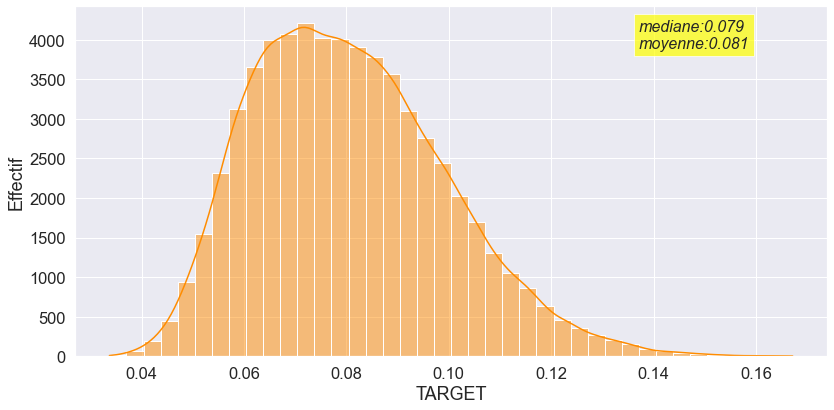

In [63]:
sns.set(
    rc={'figure.figsize': (12, 6)},
    font_scale=1.5,
)

ax = sns.histplot(data=submit,
                   x='TARGET',
                   bins=40,
                   kde=True,
                   color="darkorange")

ax.set_ylabel("Effectif", fontsize=18)

ax.text(0.75,
         0.88,
         'mediane:{:.2}\nmoyenne:{:.2}'.format(
             submit['TARGET'].median(),
             submit['TARGET'].mean(),
         ),
         style='italic',
         transform=ax.transAxes,
         fontsize=16,
         bbox={
             'facecolor': 'yellow',
             'alpha': 0.7,
             'pad': 5
         });

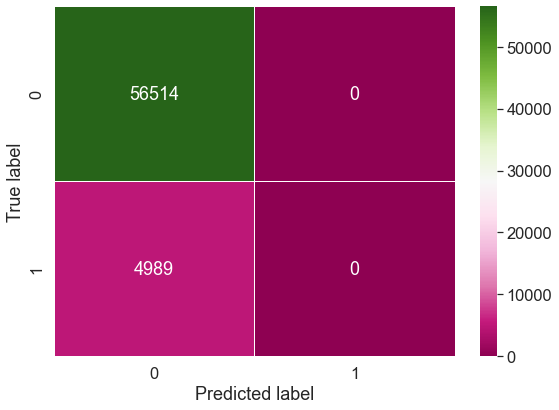

In [64]:
conf_matrix(submit['y_true'], submit['TARGET_BINARY'])

# 7.2. La résolution du problème : Resampling via SMOTE

- Tout d'abord nous allons testé le undersampling via `RandomUnderSampler`

- Ensuite, nous allons appliquer le oversampling `SMOTE`

## RandomUnderSampler

In [65]:
import imblearn

In [66]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [67]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(train, app_train['TARGET'])

In [68]:
y_rus.value_counts()

0    24825
1    24825
Name: TARGET, dtype: int64

In [69]:
# Train on the training data
log_reg.fit(X_rus, y_rus)

# Make predictions
y_pred_rus = log_reg.predict(X_test)

# Make sure to select the second column only
log_reg_pred_rus = log_reg.predict_proba(X_test)[:, 1]

In [70]:
acc_rus = round(accuracy_score(y_test, y_pred_rus), 2)
precision_rus = round(precision_score(y_test, y_pred_rus), 2)
recall_rus = round(recall_score(y_test, y_pred_rus), 2)
f1_rus = round(f1_score(y_test, y_pred_rus), 2)

In [71]:
# Ajoute à la liste des scores
score('Rég. Logistique (RandomUnderSampler)', acc_rus, precision_rus, recall_rus,  f1_rus)

modele  accuracy_score  precision_score  \
0  Rég. Logistique (RandomUnderSampler)            0.61             0.13   
1                 Régression Logistique            0.92             0.00   

   recall_score  f1_score  
0          0.65      0.21  
1          0.00      0.00

In [72]:
# Submission dataframe
submit['TARGET_RUS'] = log_reg_pred_rus

In [73]:
submit['TARGET_RUS_BINARY'] = seuil (log_reg_pred_rus, 0.5)

In [74]:
submit.head(5)

y_true    TARGET  TARGET_BINARY  TARGET_RUS  TARGET_RUS_BINARY
10246        0  0.070747              0    0.462443                  0
503          0  0.083658              0    0.503349                  1
36369        0  0.118677              0    0.580999                  1
111030       0  0.111214              0    0.561315                  1
69864        0  0.068402              0    0.462020                  0

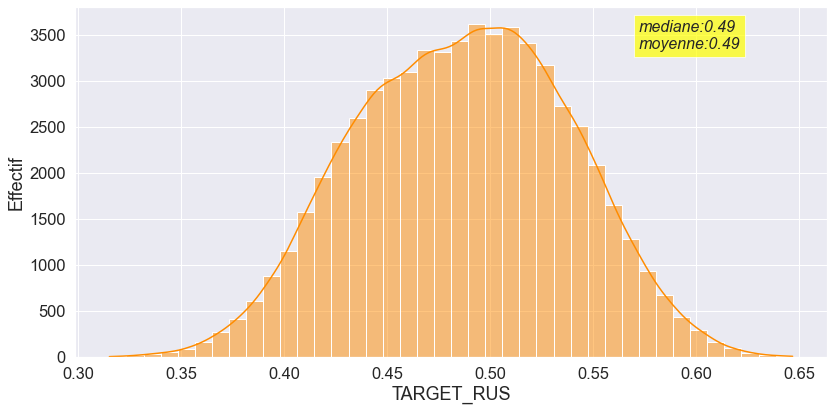

In [75]:
sns.set(
    rc={'figure.figsize': (12, 6)},
    font_scale=1.5,
)

ax = sns.histplot(data=submit,
                   x='TARGET_RUS',
                   bins=40,
                   kde=True,
                   color="darkorange")

ax.set_ylabel("Effectif", fontsize=18)

ax.text(0.75,
         0.88,
         'mediane:{:.2}\nmoyenne:{:.2}'.format(
             submit['TARGET_RUS'].median(),
             submit['TARGET_RUS'].mean(),
         ),
         style='italic',
         transform=ax.transAxes,
         fontsize=16,
         bbox={
             'facecolor': 'yellow',
             'alpha': 0.7,
             'pad': 5
         });

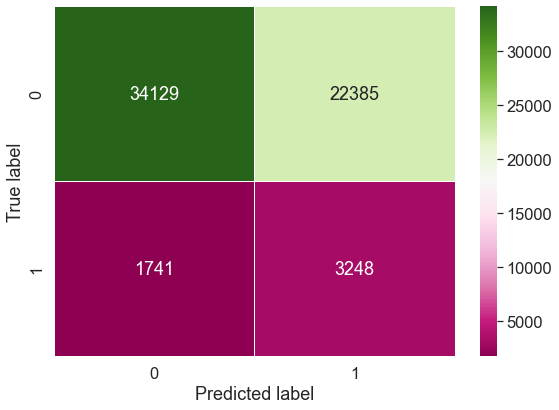

In [76]:
conf_matrix(submit['y_true'], submit['TARGET_RUS_BINARY'])

## SMOTE

<img src="support\smote.gif" style="width: 820px;"/>

[Source 3](https://blog.soat.fr/2019/12/techniques-augmentation-dataset-smote/)

In [77]:
%%time

from imblearn.over_sampling import SMOTE

smote = SMOTE() # nb de voisin = 5

X_smote, y_smote = smote.fit_resample(train, app_train['TARGET'])

CPU times: user 20 s, sys: 6.04 s, total: 26.1 s
Wall time: 25.5 s


In [78]:
y_smote.value_counts()

1    282686
0    282686
Name: TARGET, dtype: int64

In [79]:
# Train on the training data
log_reg.fit(X_smote, y_smote)

# Make predictions
y_pred_smote = log_reg.predict(X_test)

# Make sure to select the second column only
log_reg_pred_smote = log_reg.predict_proba(X_test)[:, 1]

In [80]:
# Submission dataframe
submit['TARGET_SMOTE'] = log_reg_pred_smote

In [81]:
submit['TARGET_SMOTE_BINARY'] = seuil (log_reg_pred_smote, 0.51)

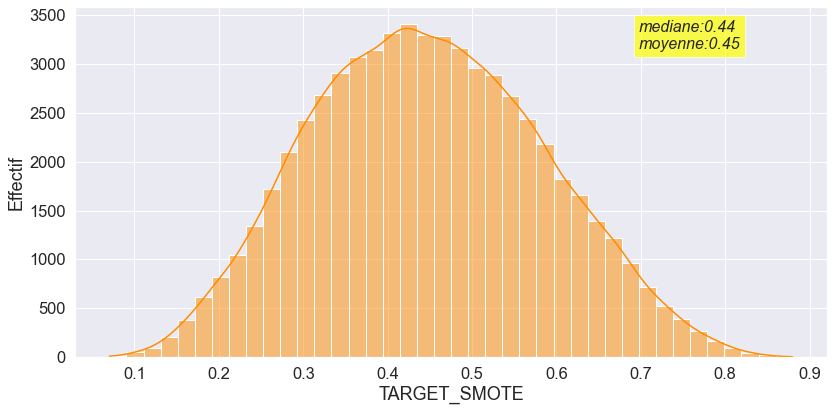

In [82]:
sns.set(
    rc={'figure.figsize': (12, 6)},
    font_scale=1.5,
)

ax = sns.histplot(data=submit,
                   x='TARGET_SMOTE',
                   bins=40,
                   kde=True,
                   color="darkorange")

ax.set_ylabel("Effectif", fontsize=18)

ax.text(0.75,
         0.88,
         'mediane:{:.2}\nmoyenne:{:.2}'.format(
             submit['TARGET_SMOTE'].median(),
             submit['TARGET_SMOTE'].mean(),
         ),
         style='italic',
         transform=ax.transAxes,
         fontsize=16,
         bbox={
             'facecolor': 'yellow',
             'alpha': 0.7,
             'pad': 5
         });

In [83]:
acc_smote = round(accuracy_score(y_test, submit['TARGET_SMOTE_BINARY']), 2)
precision_smote = round(precision_score(y_test, submit['TARGET_SMOTE_BINARY']), 2)
recall_smote = round(recall_score(y_test, submit['TARGET_SMOTE_BINARY']), 2)
f1_smote = round(f1_score(y_test, submit['TARGET_SMOTE_BINARY']), 2)

### Optimisation

In [84]:
# Ajoute à la liste des scores
score('Rég. Logistique (SMOTE)', acc_smote, precision_smote, recall_smote,  f1_smote)

modele  accuracy_score  precision_score  \
0               Rég. Logistique (SMOTE)            0.69             0.15   
1  Rég. Logistique (RandomUnderSampler)            0.61             0.13   
2                 Régression Logistique            0.92             0.00   

   recall_score  f1_score  
0          0.62      0.24  
1          0.65      0.21  
2          0.00      0.00

In [85]:
def optimize_precision (s):
    submit['TARGET_SMOTE_BINARY'] = seuil (log_reg_pred_smote, s)
    p = round(precision_score(y_test, submit['TARGET_SMOTE_BINARY']), 2)
    return p

In [86]:
optimize_precision (0.5)

0.15

In [87]:
acc_smote

0.69

In [88]:
# tn, fp, fn, tp = confusion_matrix(submit['y_true'], submit['TARGET_SMOTE_BINARY']).ravel()
# fn

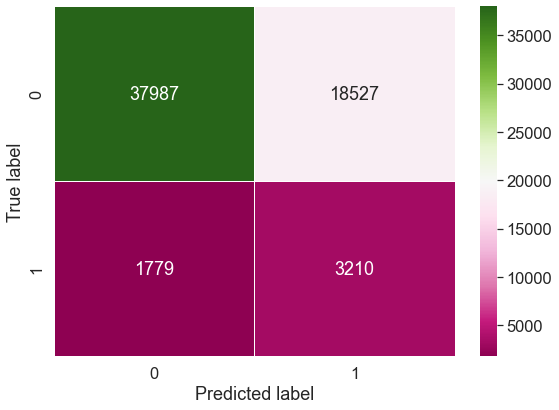

In [89]:
conf_matrix(submit['y_true'], submit['TARGET_SMOTE_BINARY'])

In [90]:
from scipy.stats import normaltest

# normality test (normaltest)
stat, p = normaltest(submit['TARGET'])
print('Avant (normaltest): ')
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('===='*20)

# normality test (normaltest)
stat, p = normaltest(submit['TARGET_RUS'])
print('Après RUS (normaltest): ')
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

print('===='*20)

# normality test (normaltest)
stat, p = normaltest(submit['TARGET_SMOTE'])
print('Après Smote (normaltest): ')
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

print('===='*20)

Avant (normaltest): 
Statistics=2499.933, p=0.000
Sample does not look Gaussian (reject H0)
Après RUS (normaltest): 
Statistics=978.662, p=0.000
Sample does not look Gaussian (reject H0)
Après Smote (normaltest): 
Statistics=1282.751, p=0.000
Sample does not look Gaussian (reject H0)


## 7.3. Performance du Features Engineering

In [91]:
%%time

print('Convertir le data avec polynomial features via SMOTE...\n')
X_poly_smote, y_poly_smote = smote.fit_resample(train_poly, app_train['TARGET'])
print('done.\n')

print('Convertir le data avec polynomial features Domain Knowledge Features et via SMOTE...\n')
X_domain_smote, y_domain_smote = smote.fit_resample(train_domain, app_train['TARGET'])
print('done.\n')

Convertir le data avec polynomial features via SMOTE...

done.

Convertir le data avec polynomial features Domain Knowledge Features et via SMOTE...

done.

CPU times: user 42 s, sys: 15.1 s, total: 57.1 s
Wall time: 55.2 s


### Entrainement 1

In [92]:
%%time

# Train on the training data
log_reg.fit(X_poly_smote, y_poly_smote)

# Make predictions
y_pred_poly_smote = log_reg.predict(X_test_poly)

# Make sure to select the second column only
log_reg_pred_poly_smote = log_reg.predict_proba(X_test_poly)[:, 1]

CPU times: user 11.3 s, sys: 2.1 s, total: 13.4 s
Wall time: 9.94 s


In [93]:
# Submission dataframe
submit['TARGET_POLY_SMOTE'] = log_reg_pred_poly_smote

# 0-1 par rapport au seuil
submit['TARGET_POLY_SMOTE_BINARY'] = seuil (log_reg_pred_poly_smote, 0.51)

In [94]:
acc_poly_smote = round(accuracy_score(y_test, submit['TARGET_POLY_SMOTE_BINARY']), 2)
precision_poly_smote = round(precision_score(y_test, submit['TARGET_POLY_SMOTE_BINARY']), 2)
recall_poly_smote = round(recall_score(y_test, submit['TARGET_POLY_SMOTE_BINARY']), 2)
f1_poly_smote = round(f1_score(y_test, submit['TARGET_POLY_SMOTE_BINARY']), 2)

In [95]:
# Ajoute à la liste des scores
score('Rég. Logistique (POLY_SMOTE)', acc_poly_smote, precision_poly_smote, recall_poly_smote,  f1_poly_smote)

modele  accuracy_score  precision_score  \
0          Rég. Logistique (POLY_SMOTE)            0.69             0.16   
1               Rég. Logistique (SMOTE)            0.69             0.15   
2  Rég. Logistique (RandomUnderSampler)            0.61             0.13   
3                 Régression Logistique            0.92             0.00   

   recall_score  f1_score  
0          0.66      0.25  
1          0.62      0.24  
2          0.65      0.21  
3          0.00      0.00

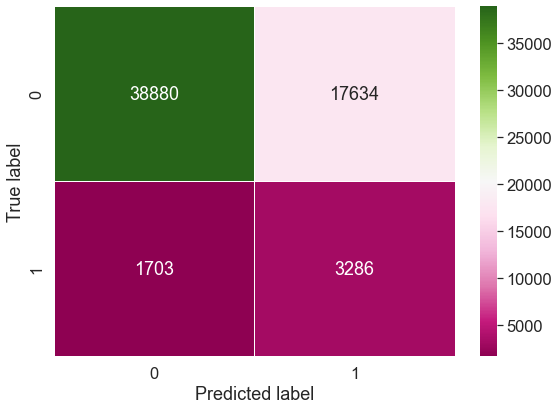

In [96]:
conf_matrix(submit['y_true'], submit['TARGET_POLY_SMOTE_BINARY'])

### Entrainement 2

In [97]:
%%time

# Train on the training data
log_reg.fit(X_domain_smote, y_domain_smote)

# Make predictions
y_pred_domain_smote = log_reg.predict(X_test_domain)

# Make sure to select the second column only
log_reg_pred_domain_smote = log_reg.predict_proba(X_test_domain)[:, 1]

CPU times: user 7.74 s, sys: 1.24 s, total: 8.98 s
Wall time: 6.14 s


In [98]:
# Submission dataframe
submit['TARGET_DOMAIN_SMOTE'] = log_reg_pred_domain_smote

# 0-1 par rapport au seuil
submit['TARGET_DOMAIN_SMOTE_BINARY'] = seuil (log_reg_pred_domain_smote, 0.51)

In [99]:
acc_domain_smote = round(accuracy_score(y_test, submit['TARGET_DOMAIN_SMOTE_BINARY']), 2)
precision_domain_smote = round(precision_score(y_test, submit['TARGET_DOMAIN_SMOTE_BINARY']), 2)
recall_domain_smote = round(recall_score(y_test, submit['TARGET_DOMAIN_SMOTE_BINARY']), 2)
f1_domain_smote = round(f1_score(y_test, submit['TARGET_DOMAIN_SMOTE_BINARY']), 2)

In [100]:
# Ajoute à la liste des scores
score('Rég. Logistique (DOMAIN_SMOTE)', acc_domain_smote, precision_domain_smote, recall_domain_smote,  f1_domain_smote)

modele  accuracy_score  precision_score  \
0          Rég. Logistique (POLY_SMOTE)            0.69             0.16   
1               Rég. Logistique (SMOTE)            0.69             0.15   
2        Rég. Logistique (DOMAIN_SMOTE)            0.69             0.15   
3  Rég. Logistique (RandomUnderSampler)            0.61             0.13   
4                 Régression Logistique            0.92             0.00   

   recall_score  f1_score  
0          0.66      0.25  
1          0.62      0.24  
2          0.62      0.24  
3          0.65      0.21  
4          0.00      0.00

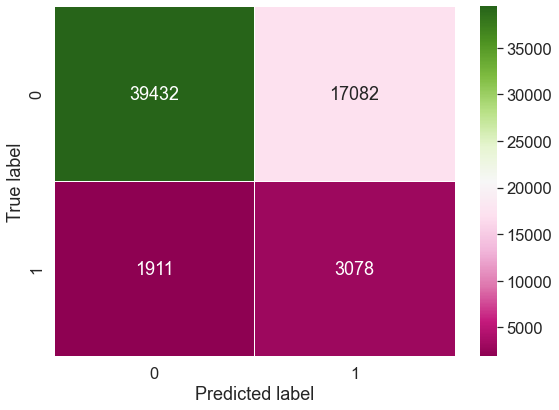

In [101]:
conf_matrix(submit['y_true'], submit['TARGET_DOMAIN_SMOTE_BINARY'])

In [102]:
submit

y_true    TARGET  TARGET_BINARY  TARGET_RUS  TARGET_RUS_BINARY  \
10246        0  0.070747              0    0.462443                  0   
503          0  0.083658              0    0.503349                  1   
36369        0  0.118677              0    0.580999                  1   
111030       0  0.111214              0    0.561315                  1   
69864        0  0.068402              0    0.462020                  0   
...        ...       ...            ...         ...                ...   
258461       0  0.088312              0    0.517818                  1   
201246       0  0.104184              0    0.546028                  1   
306888       0  0.069315              0    0.454705                  0   
197884       0  0.085330              0    0.512542                  1   
176193       0  0.079163              0    0.497692                  0   

        TARGET_SMOTE  TARGET_SMOTE_BINARY  TARGET_POLY_SMOTE  \
10246       0.454321                    0           0.553787   
503         0.513679                    1           0.420827   
36369       0.674821                    1           0.703792   
111030      0.579649                    1           0.568509   
69864       0.313835                    0           0.157610   
...              ...                  ...                ...   
258461      0.490672                    0           0.395366   
201246      0.707016                    1           0.762365   
306888      0.482606                    0           0.483166   
197884      0.438032                    0           0.310153   
176193      0.334754                    0           0.270149   

        TARGET_POLY_SMOTE_BINARY  TARGET_DOMAIN_SMOTE  \
10246                          1             0.469858   
503                            0             0.518026   
36369                          1             0.673908   
111030                         1             0.579508   
69864                          0             0.309854   
...                          ...                  ...   
258461                         0             0.501112   
201246                         1             0.713146   
306888                         0             0.483842   
197884                         0             0.445816   
176193                         0             0.331978   

        TARGET_DOMAIN_SMOTE_BINARY  
10246                            0  
503                              1  
36369                            1  
111030                           1  
69864                            0  
...                            ...  
258461                           0  
201246                           1  
306888                           0  
197884                           0  
176193                           0  

[61503 rows x 11 columns]

# 8. Modélisation

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

import xgboost as xgb

### 8.1. KNN Classifieur

In [104]:
%%time

# classifieur
knn = KNeighborsClassifier(n_neighbors=4)

# entrainement
knn.fit(X_poly_smote, y_poly_smote)

# predictions
knn_pred_poly_smote = knn.predict_proba(X_test_poly)[:, 1]

CPU times: user 18min 46s, sys: 3min 16s, total: 22min 3s
Wall time: 17min 35s


In [105]:
# Submission dataframe
submit['KNN_TARGET'] = knn_pred_poly_smote

# 0-1 par rapport au seuil
submit['KNN_TARGET_BINARY'] = seuil (knn_pred_poly_smote, 0.51)

In [106]:
acc_knn = round(accuracy_score(y_test, submit['KNN_TARGET_BINARY']), 2)
precision_knn = round(precision_score(y_test, submit['KNN_TARGET_BINARY']), 2)
recall_knn = round(recall_score(y_test, submit['KNN_TARGET_BINARY']), 2)
f1_knn = round(f1_score(y_test, submit['KNN_TARGET_BINARY']), 2)

In [107]:
# Ajoute à la liste des scores
score('KNN', acc_knn, precision_knn, recall_knn,  f1_knn)

modele  accuracy_score  precision_score  \
0                                   KNN            0.87             0.39   
1          Rég. Logistique (POLY_SMOTE)            0.69             0.16   
2               Rég. Logistique (SMOTE)            0.69             0.15   
3        Rég. Logistique (DOMAIN_SMOTE)            0.69             0.15   
4  Rég. Logistique (RandomUnderSampler)            0.61             0.13   
5                 Régression Logistique            0.92             0.00   

   recall_score  f1_score  
0          1.00      0.56  
1          0.66      0.25  
2          0.62      0.24  
3          0.62      0.24  
4          0.65      0.21  
5          0.00      0.00

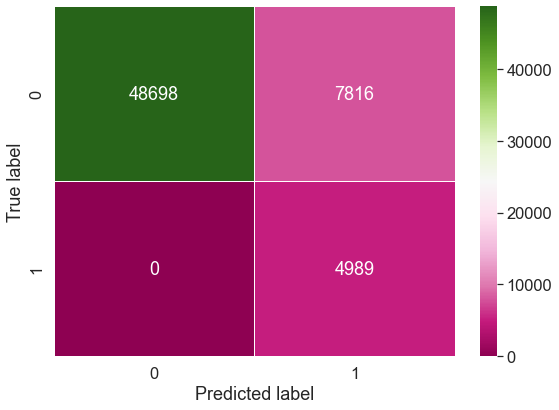

In [108]:
conf_matrix(submit['y_true'], submit['KNN_TARGET_BINARY'])

### 8.2. Gradient Boosting Classifieur

In [109]:
%%time

# classifieur
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=4)

# entrainement
gb.fit(X_poly_smote, y_poly_smote)

# predictions
gb_pred_poly_smote = gb.predict_proba(X_test_poly)[:, 1]

CPU times: user 13min 39s, sys: 8.33 s, total: 13min 48s
Wall time: 14min 41s


In [110]:
# Submission dataframe
submit['GB_TARGET'] = gb_pred_poly_smote

# 0-1 par rapport au seuil
submit['GB_TARGET_BINARY'] = seuil (gb_pred_poly_smote, 0.51)

In [111]:
acc_gb = round(accuracy_score(y_test, submit['GB_TARGET_BINARY']), 2)
precision_gb = round(precision_score(y_test, submit['GB_TARGET_BINARY']), 2)
recall_gb = round(recall_score(y_test, submit['GB_TARGET_BINARY']), 2)
f1_gb = round(f1_score(y_test, submit['GB_TARGET_BINARY']), 2)

In [112]:
# Ajoute à la liste des scores
score('Gradient Boosting', acc_gb, precision_gb, recall_gb,  f1_gb)

modele  accuracy_score  precision_score  \
0                                   KNN            0.87             0.39   
1                     Gradient Boosting            0.90             0.23   
2          Rég. Logistique (POLY_SMOTE)            0.69             0.16   
3               Rég. Logistique (SMOTE)            0.69             0.15   
4        Rég. Logistique (DOMAIN_SMOTE)            0.69             0.15   
5  Rég. Logistique (RandomUnderSampler)            0.61             0.13   
6                 Régression Logistique            0.92             0.00   

   recall_score  f1_score  
0          1.00      0.56  
1          0.08      0.12  
2          0.66      0.25  
3          0.62      0.24  
4          0.62      0.24  
5          0.65      0.21  
6          0.00      0.00

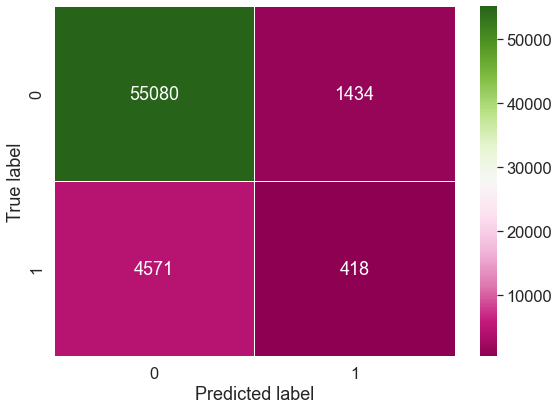

In [113]:
conf_matrix(submit['y_true'], submit['GB_TARGET_BINARY'])

### 8.3. Random Forest Classifieur

In [114]:
%%time

# classifieur
rf = RandomForestClassifier(max_depth=2, random_state=0)

# entrainement
rf.fit(X_poly_smote, y_poly_smote)

# predictions
rf_pred_poly_smote = rf.predict_proba(X_test_poly)[:, 1]

CPU times: user 1min 17s, sys: 2.72 s, total: 1min 19s
Wall time: 1min 21s


In [115]:
# Submission dataframe
submit['RF_TARGET'] = rf_pred_poly_smote

# 0-1 par rapport au seuil
submit['RF_TARGET_BINARY'] = seuil (rf_pred_poly_smote, 0.51)

In [116]:
acc_rf = round(accuracy_score(y_test, submit['RF_TARGET_BINARY']), 2)
precision_rf = round(precision_score(y_test, submit['RF_TARGET_BINARY']), 2)
recall_rf = round(recall_score(y_test, submit['RF_TARGET_BINARY']), 2)
f1_rf = round(f1_score(y_test, submit['RF_TARGET_BINARY']), 2)

In [117]:
# Ajoute à la liste des scores
score('Random Forest', acc_rf, precision_rf, recall_rf,  f1_rf)

modele  accuracy_score  precision_score  \
0                                   KNN            0.87             0.39   
1                     Gradient Boosting            0.90             0.23   
2          Rég. Logistique (POLY_SMOTE)            0.69             0.16   
3               Rég. Logistique (SMOTE)            0.69             0.15   
4        Rég. Logistique (DOMAIN_SMOTE)            0.69             0.15   
5                         Random Forest            0.67             0.14   
6  Rég. Logistique (RandomUnderSampler)            0.61             0.13   
7                 Régression Logistique            0.92             0.00   

   recall_score  f1_score  
0          1.00      0.56  
1          0.08      0.12  
2          0.66      0.25  
3          0.62      0.24  
4          0.62      0.24  
5          0.62      0.23  
6          0.65      0.21  
7          0.00      0.00

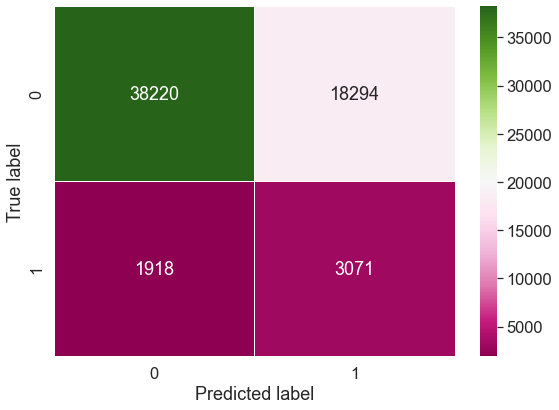

In [118]:
conf_matrix(submit['y_true'], submit['RF_TARGET_BINARY'])

### 8.4. XGBoost Classifieur

In [119]:
%%time

# classifieur
xgb = xgb.XGBClassifier(random_state=4)

# entrainement
xgb.fit(X_poly_smote, y_poly_smote)

# predictions
xgb_pred_poly_smote = xgb.predict_proba(X_test_poly)[:, 1]

[15:19:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 37min 50s, sys: 18.9 s, total: 38min 9s
Wall time: 12min 28s


In [120]:
# Submission dataframe
submit['XGB_TARGET'] = xgb_pred_poly_smote

# 0-1 par rapport au seuil
submit['XGB_TARGET_BINARY'] = seuil (xgb_pred_poly_smote, 0.08)

In [122]:
acc_xgb = round(accuracy_score(y_test, submit['XGB_TARGET_BINARY']), 2)
precision_xgb = round(precision_score(y_test, submit['XGB_TARGET_BINARY']), 2)
recall_xgb = round(recall_score(y_test, submit['XGB_TARGET_BINARY']), 2)
f1_xgb = round(f1_score(y_test, submit['XGB_TARGET_BINARY']), 2)

In [123]:
# Ajoute à la liste des scores
score('XGBoost', acc_xgb, precision_xgb, recall_xgb,  f1_xgb)

modele  accuracy_score  precision_score  \
0                                   KNN            0.87             0.39   
1                     Gradient Boosting            0.90             0.23   
2                               XGBoost            0.69             0.18   
3          Rég. Logistique (POLY_SMOTE)            0.69             0.16   
4               Rég. Logistique (SMOTE)            0.69             0.15   
5        Rég. Logistique (DOMAIN_SMOTE)            0.69             0.15   
6                         Random Forest            0.67             0.14   
7  Rég. Logistique (RandomUnderSampler)            0.61             0.13   
8                 Régression Logistique            0.92             0.00   

   recall_score  f1_score  
0          1.00      0.56  
1          0.08      0.12  
2          0.78      0.29  
3          0.66      0.25  
4          0.62      0.24  
5          0.62      0.24  
6          0.62      0.23  
7          0.65      0.21  
8          0.00      0.00

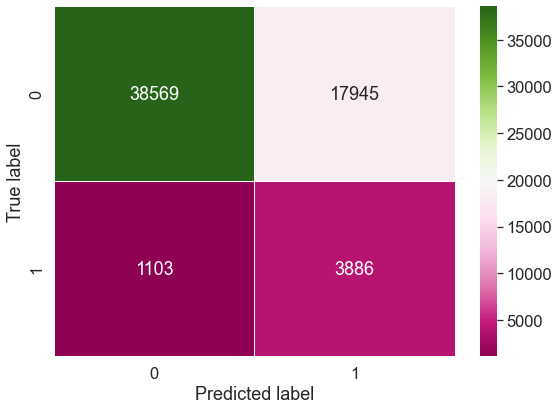

In [124]:
conf_matrix(submit['y_true'], submit['XGB_TARGET_BINARY'])

# ROC AUC

In [144]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, _ = roc_curve(submit['y_true'], submit['TARGET_POLY_SMOTE'])
fpr2, tpr2, _ = roc_curve(submit['y_true'], submit['RF_TARGET'])
fpr3, tpr3, _ = roc_curve(submit['y_true'], submit['XGB_TARGET'])
fpr4, tpr4, _ = roc_curve(submit['y_true'], submit['GB_TARGET'])
fpr5, tpr5, _ = roc_curve(submit['y_true'], submit['KNN_TARGET'])

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

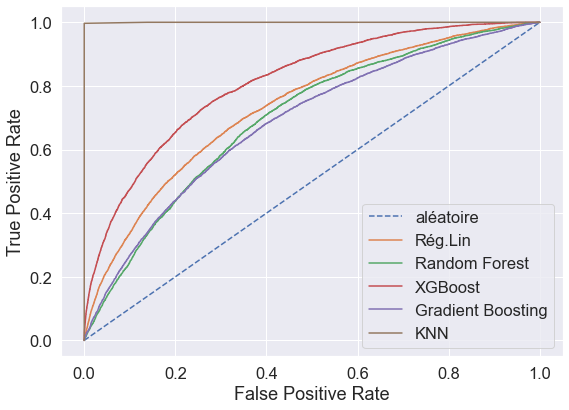

In [145]:
plt.figure(figsize=(8,6))
plt.plot(p_fpr, p_tpr, linestyle='dashed', label='aléatoire')
plt.plot(fpr1, tpr1, label='Rég.Lin')
plt.plot(fpr2, tpr2, label='Random Forest')
plt.plot(fpr3, tpr3, label='XGBoost')
plt.plot(fpr4, tpr4, label='Gradient Boosting')
plt.plot(fpr5, tpr5, label='KNN')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right');

In [127]:
from sklearn.metrics import roc_auc_score

# L'enregistrement des scores :

def ajout_roc_auc (modele, roc_auc):
    df_roc_auc.loc[df_roc_auc.shape[0]] = [modele, roc_auc]
    df_roc_auc.sort_values(by='roc_auc', ascending=False, inplace=True)
    df_roc_auc.drop_duplicates(subset=['modele'], keep='last', inplace=True)
    df_roc_auc.reset_index(drop=True, inplace=True)
    return df_roc_auc

scores_roc_auc = []

df_roc_auc= pd.DataFrame(
    scores_roc_auc, columns=['modele', 'roc_auc'])

In [151]:
# auc scores
auc_score_lr = round(roc_auc_score(submit['y_true'], submit['TARGET_POLY_SMOTE_BINARY']), 2)
auc_score_rf = round(roc_auc_score(submit['y_true'], submit['RF_TARGET_BINARY']), 2)
auc_score_xgb = round(roc_auc_score(submit['y_true'], submit['XGB_TARGET_BINARY']), 2)
auc_score_gb = round(roc_auc_score(submit['y_true'], submit['GB_TARGET_BINARY']), 2)
auc_score_knn = round(roc_auc_score(submit['y_true'], submit['KNN_TARGET_BINARY']), 2)

# ajout au dataframe
ajout_roc_auc('Rég.Lin', auc_score_lr)
ajout_roc_auc('Random Forest', auc_score_rf)
ajout_roc_auc('XGBoost', auc_score_xgb)
ajout_roc_auc('Gradient Boosting', auc_score_gb)
ajout_roc_auc('KNN', auc_score_knn)

modele  roc_auc
0                KNN     0.93
1            XGBoost     0.73
2            Rég.Lin     0.67
3      Random Forest     0.65
4  Gradient Boosting     0.53

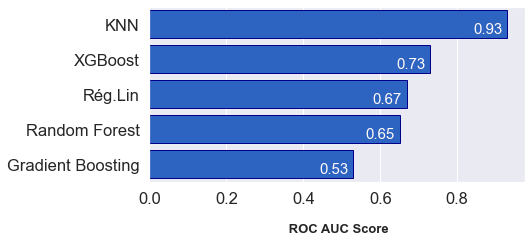

In [130]:
plt.figure(figsize=(6, 3))
# plt.title('Title', fontdict=font, pad=20)
col_hist = sns.barplot(x=df_roc_auc['roc_auc'],
                       y=df_roc_auc['modele'],
                       edgecolor='darkblue',
                       color='#155eda') 
plt.ylabel('', size=11, weight='bold')
plt.xlabel('\n ROC AUC Score', size=13, weight='bold')

for p in col_hist.patches:
    col_hist.annotate(format(round(p.get_width(),2)),
                      (p.get_width() - 0.11, p.get_y() + 0.1 + p.get_height()),
                      #weight='bold',
                      color='#fffafa',
                      fontsize=15,
                      #ha='center',
                      #va='center',
                      xytext=(8, 8),
                      textcoords='offset points')
plt.show()

# 9. Sélection du meilleur modèle et son optimisation

Nous constatons que le modèle le plus promettant est KNN. Nous allons à present nous servir du GridSearchCV afin d'avoir les meilleurs hyperparameters pour l'algorithme.

In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

parametres_knn = {
    'n_neighbors': [3,4,5],
    # 'metric': ['euclidean', 'manhattan', 'minkowski']
}

# On entraîne ce modèle sur les données d'entrainement
grid_knn = GridSearchCV(KNeighborsClassifier(), parametres_knn, scoring=roc_auc_score, cv=5)
grid_knn.fit(X_poly_smote, y_poly_smote)

# predictions
grid_knn_pred_poly_smote = grid_knn.predict_proba(X_test_poly)[:, 1]

In [137]:
#Best parameters: best_params
print("Best parameters:\n",grid_knn.best_params_)

#Best result: best_score_
print("Best result:\n", grid_knn.best_score_)

#Best estimator: best_estimator_
print("Best estimator:\n", grid_knn.best_estimator_)

#Cross validation results: cv_results_
print("Cross validation result:\n", grid_knn.cv_results_)

Best parameters:
 {'n_neighbors': 3}
Best result:
 nan
Best estimator:
 KNeighborsClassifier(n_neighbors=3)
Cross validation result:
 {'mean_fit_time': array([1.21655164, 0.7677443 , 0.72845321]), 'std_fit_time': array([0.62642131, 0.12893717, 0.1025907 ]), 'mean_score_time': array([0.00723844, 0.00808001, 0.00147099]), 'std_score_time': array([0.01187032, 0.00839224, 0.00079709]), 'param_n_neighbors': masked_array(data=[3, 4, 5],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}], 'split0_test_score': array([nan, nan, nan]), 'split1_test_score': array([nan, nan, nan]), 'split2_test_score': array([nan, nan, nan]), 'split3_test_score': array([nan, nan, nan]), 'split4_test_score': array([nan, nan, nan]), 'mean_test_score': array([nan, nan, nan]), 'std_test_score': array([nan, nan, nan]), 'rank_test_score': array([1, 2, 3], dtype=int32)}


In [153]:
round(roc_auc_score(submit['y_true'], submit['KNN_TARGET_BINARY']), 2)

0.93

# 10. Déploiement du modèle

## 10.1. Enregistrement via JobLib

Sérialiser le modèle à l'aide de [joblib](https://scikit-learn.org/stable/modules/model_persistence.html), sous le nom de fichier `gb_modele.joblib`.

In [193]:
app_train_poly.shape

(307511, 275)

In [157]:
X_poly_smote

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.65615892e-03, 2.30770153e-02, 2.72943738e-02],
       [2.80699391e-06, 0.00000000e+00, 0.00000000e+00, ...,
        2.52381267e-01, 2.78935807e-01, 2.74456776e-01],
       [5.61398781e-06, 1.00000000e+00, 1.00000000e+00, ...,
        5.32637189e-01, 4.90716594e-01, 4.14937545e-01],
       ...,
       [4.23182694e-01, 0.00000000e+00, 0.00000000e+00, ...,
        9.21337555e-02, 8.56606048e-02, 5.88838185e-02],
       [4.98586792e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.42927742e-01, 3.74925293e-01, 5.43441044e-01],
       [8.97467989e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.43258949e-01, 2.59254110e-01, 2.43341921e-01]])

In [158]:
import joblib

In [159]:
joblib.dump(grid_knn, 'knn_modele.joblib')

['knn_modele.joblib']

In [162]:
#Loading the saved model with joblib
pipe = joblib.load('knn_modele.joblib')

In [163]:
pipe

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5]},
             scoring=<function roc_auc_score at 0x7fc3323df0d0>)

In [180]:
print(knn.predict(X_test_poly[0:1]))

[1]


In [179]:
app_train['TARGET'][0]

1

## 10.2. Déploiement du modèle avec MLflow

In [ ]:
import mlflow

from mlflow import sklearn

from mlflow.models.signature import infer_signature

signature = infer_signature(train, train_labels)

import mlflow.sklearn

mlflow.sklearn.save_model(gb, 'mlflow_model', signature=signature)

# 10.3. Création du dashboard

Régardez au fichier `P7_Dashboard.py`

Pour accéder au dashboard, écrit 

`cd /Users/fyasar/Desktop/P7`
    
et 

`streamlit run P7_Dashboard.py`


@st.cache()
def request_id_data():
    id_json = requests.get(MLFLOW_URI + 'load_data')
    data_id = id_json.json()
    
    liste_id = []
    for i in data_id:
        liste_id.append(i[0])
        
    return liste_id
    
    liste_id = request_id_data()
    global client_id
    client_id = st.sidebar.selectbox('Client\'s ID', liste_id)

In [196]:
app_train_poly

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0           100002                   0             0                1   
1           100003                   0             0                0   
2           100004                   1             1                1   
3           100006                   0             0                1   
4           100007                   0             0                1   
...            ...                 ...           ...              ...   
307506      456251                   0             0                0   
307507      456252                   0             0                1   
307508      456253                   0             0                1   
307509      456254                   0             0                1   
307510      456255                   0             0                0   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    406597.5      24700.5   
1                  0          270000.0   1293502.5      35698.5   
2                  0           67500.0    135000.0       6750.0   
3                  0          135000.0    312682.5      29686.5   
4                  0          121500.0    513000.0      21865.5   
...              ...               ...         ...          ...   
307506             0          157500.0    254700.0      27558.0   
307507             0           72000.0    269550.0      12001.5   
307508             0          153000.0    677664.0      29979.0   
307509             0          171000.0    370107.0      20205.0   
307510             0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  ...  EXT_SOURCE_2^3  \
0              351000.0                    0.018801  ...        0.018181   
1             1129500.0                    0.003541  ...        0.240927   
2              135000.0                    0.010032  ...        0.171798   
3              297000.0                    0.008019  ...        0.275185   
4              513000.0                    0.028663  ...        0.033616   
...                 ...                         ...  ...             ...   
307506         225000.0                    0.032561  ...        0.316702   
307507         225000.0                    0.025164  ...        0.001561   
307508         585000.0                    0.005002  ...        0.153751   
307509         319500.0                    0.005313  ...        0.135926   
307510         675000.0                    0.046220  ...        0.355751   

        EXT_SOURCE_2^2 EXT_SOURCE_3  EXT_SOURCE_2^2 DAYS_BIRTH  \
0                          0.009637                 654.152107   
1                          0.207254                6491.237078   
2                          0.225464                5885.942404   
3                          0.226462                8040.528832   
4                          0.055754                2076.117157   
...                             ...                        ...   
307506                     0.248701                4333.535804   
307507                     0.007202                 279.510194   
307508                     0.062812                4295.209004   
307509                     0.174750                3162.050698   
307510                     0.057197                8462.889915   

        EXT_SOURCE_2 EXT_SOURCE_3^2  EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH  \
0                          0.005108                            346.733022   
1                          0.178286                           5583.975307   
2                          0.295894                           7724.580288   
3                          0.186365                           6616.894625   
4                          0.092471                           3443.335521   
...                             ...                                   ...   
307506                     0.195302                           3403.064320   
3075

In [197]:
data_sampled = app_train_poly.sample(n=1000, replace="False", random_state=4)

data_sampled.to_csv('data/data_sampled.csv', index=False)

data_sampled.fillna(0, inplace=True)
data_sampled.shape

(1000, 275)

In [198]:
data_sampled.head(5)

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
120705      239953                   0             0                1   
129384      250069                   0             0                1   
115144      233527                   0             1                1   
94601       209846                   0             0                1   
107578      224804                   1             1                0   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
120705             0          135000.0     59256.0       4810.5   
129384             1          103500.0    536917.5      32976.0   
115144             0          202500.0    450000.0      30073.5   
94601              0          202500.0    254700.0      24808.5   
107578             0          112500.0    292500.0      14625.0   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  ...  EXT_SOURCE_2^3  \
120705          45000.0                    0.007330  ...        0.067412   
129384         463500.0                    0.011657  ...        0.260265   
115144         450000.0                    0.028663  ...        0.061483   
94601          225000.0                    0.030755  ...        0.363588   
107578         292500.0                    0.028663  ...        0.242069   

        EXT_SOURCE_2^2 EXT_SOURCE_3  EXT_SOURCE_2^2 DAYS_BIRTH  \
120705                     0.117714                2402.397338   
129384                     0.218200                4093.932829   
115144                     0.034093                1746.104921   
94601                      0.362784                9849.576738   
107578                     0.198825                9144.382178   

        EXT_SOURCE_2 EXT_SOURCE_3^2  EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH  \
120705                     0.205551                           4195.048415   
129384                     0.182934                           3432.259079   
115144                     0.018905                            968.240348   
94601                      0.361981                           9827.781555   
107578                     0.163306                           7510.801071   

        EXT_SOURCE_2 DAYS_BIRTH^2  EXT_SOURCE_3^3  EXT_SOURCE_3^2 DAYS_BIRTH  \
120705               8.561584e+07        0.358932                7325.362432   
129384               6.439699e+07        0.153368                2877.527032   
115144               4.958901e+07        0.010483                 536.903230   
94601                2.668241e+08        0.361180                9806.034600   
107578               3.454378e+08        0.134133                6169.048016   

        EXT_SOURCE_3 DAYS_BIRTH^2  DAYS_BIRTH^3  
120705               1.495017e+08  3.051149e+12  
129384               5.398895e+07  1.012956e+12  
115144               2.749782e+07  1.408318e+12  
94601                2.662337e+08  7.228239e+12  
107578               2.837277e+08  1.304925e+13  

[5 rows x 275 columns]